<a href="https://colab.research.google.com/github/pireylow/LSTM-dehli-climate-practice/blob/main/Moving_Average_Crossover_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


     |████████████████████████████████| 6.4 MB 6.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#import necessary modules
import random
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [ ]:
#set stock information
ticker = 'SPY'
startdate = '2010-01-01'
enddate = '2022-01-01'

start = pd.to_datetime(startdate)
end = pd.to_datetime(enddate)
sdata = pdr.get_data_yahoo(ticker, start=start, end=end)

columnsTitles=['Open','High','Low','Close','Volume','Adj Close']
sdata=sdata.reindex(columns=columnsTitles)

[*********************100%***********************]  1 of 1 completed


In [ ]:
close=sdata['Close']
close.describe()

count    3021.000000
mean      225.915114
std        88.706206
min       102.199997
25%       146.619995
50%       208.779999
75%       279.339996
max       477.480011
Name: Close, dtype: float64

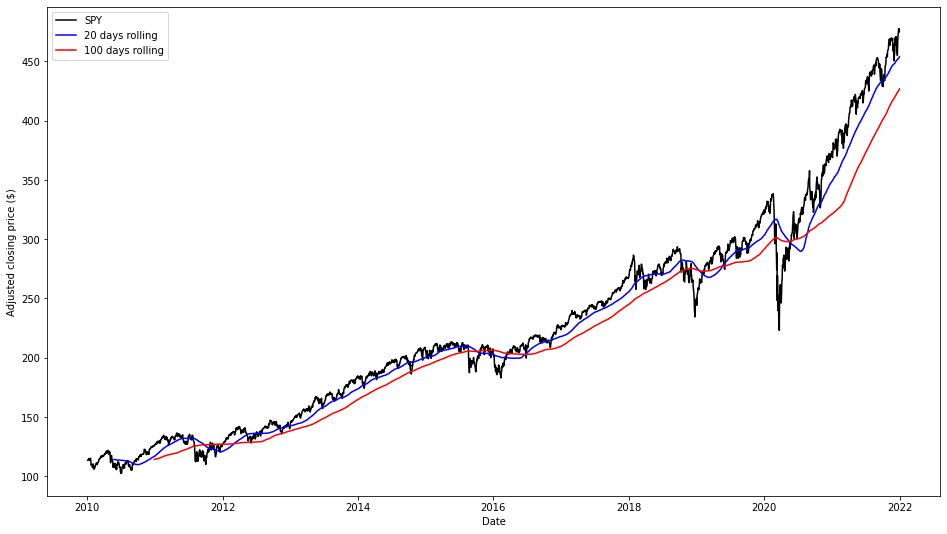

In [ ]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling = close.rolling(window=100).mean()
long_rolling = close.rolling(window=250).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label='100 days rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()


In [ ]:

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling = close.rolling(window=100).mean()
long_rolling = close.rolling(window=250).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label='100 days rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label='250 days rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

time_counter = 200
profit_list = [ ]
profit_info = [ ]
profit = 0
FF_loop_flag = True
while FF_loop_flag:

  #FF to first up cross and save the entry price

  while FF_loop_flag and short_rolling[time_counter] <= long_rolling[time_counter]:
    time_counter += 1
    if time_counter >= len(short_rolling):
      FF_loop_flag = False
      time_counter -= 1
  entry_price = close[time_counter]
  profit_info.append(('entry', time_counter, entry_price))
  ax.plot(close.index[time_counter], entry_price, 'x', color = 'b')

  #FF to first up cross and save the exit price

  while FF_loop_flag and short_rolling[time_counter] >= long_rolling[time_counter]:
    time_counter += 1
    if time_counter >= len(short_rolling):
      FF_loop_flag = False
      time_counter -= 1
  exit_price = close[time_counter]
  profit = profit + (exit_price - entry_price)
  profit_info.append(('exit', time_counter, exit_price, exit_price - entry_price))
  profit_list.append(exit_price - entry_price)
  ax.plot(close.index[time_counter], exit_price, 'x', color = 'r')



In [ ]:
profit_list

In [ ]:
 profit_info

In [ ]:
print(profit)